# Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from faker import Faker
import matplotlib.colors as colors

# Function

In [70]:
def generate_fighter_data(number_of_fighters=300):
    """
    Generate simulated fight data for a number of fighters.

    Parameters:
    number_of_fighters (int): The total number of fighters. Default is 300.
    prob_of_winning (float): The probability of a fighter winning a fight. This parameter is not currently used. Default is 0.5.
    number_of_fights_in_career (int): The total number of fights each fighter has in their career. Default is 12.

    Returns:
    df (pd.DataFrame): A DataFrame with columns 'Wins' and 'Losses', each row representing a fighter.
    """
    
    # initialize dictionary
    d = {}

    # assign starting values
    for i in range(number_of_fighters):
        d[i] = [0, 0]

    # simulate fight
    for i in range(len(d)):
        outcome = np.random.uniform(.4, .8)
        for _ in range(np.random.randint(1, 13)):
                if d[i][1] > 3:
                     break
                result = np.random.choice([0, 1], p=[outcome, 1-outcome])
                d[i][result] += 1

    # convert to DataFrame
    df = pd.DataFrame(d.values()).sort_values(by=1)
    df.columns = ['Wins', 'Losses']

    return df

def plot_fighter_data(number_of_fighters):

    """
    This function generates and plots data for a specified number of fighters.

    It calculates the win percentage of each fighter, rounds it to three decimal places,
    and then creates a histogram plot of these win percentages with color coding by height.
    
    """
    
    df = generate_fighter_data(number_of_fighters=number_of_fighters)

    # calculate win pct
    df['win pct'] = df['Wins'] / (df['Wins'] + df['Losses'])

    # Round to 3 significant figures
    df['win pct'] = np.round(df['win pct'], 3)

    plt.figure(figsize=(10, 6))  # Change the figure size here

    # create the histogram plot with edge color and line width specified
    n, bins, patches = plt.hist(df['win pct'], bins=10, density=True, edgecolor='black', linewidth=3, color='red')

    plt.title('Distribution of Win Percentage', fontsize=18, color='white')
    plt.xlabel('Win Percentage', fontsize=14, color='white')
    plt.ylabel('Percentage', fontsize=14, color='white')

    plt.xticks(fontsize=14, color='white')
    plt.yticks(fontsize=14, color='white')

    # We'll color code by height, but you could use any scalar
    fracs = n / n.max()

    # we need to normalize the data to 0..1 for the full range of the colormap
    norm = colors.Normalize(fracs.min(), fracs.max())

    # Loop through the rectangles (bins) and set the color accordingly
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)

    plt.grid(False)  # Optionally remove the grid

    plt.tight_layout()
    plt.show()

def plot_win_loss_distribution(number_of_fighters):

    """
     This function generates data for a specified number of fighters and plots the distribution
    of wins and losses in a bar graph format.
    
    The function first calculates the counts of wins and losses, sorts these counts in ascending 
    order, and creates a bar plot. The plot's aesthetics, such as color and size, are configured 
    for better readability.
    """

    df = generate_fighter_data(number_of_fighters=number_of_fighters)

    # calculate counts
    value_counts = df[['Wins', 'Losses']].value_counts()

    # sort by index (wins)
    value_counts = value_counts.sort_index(ascending=True)

    # calculate total for percentages
    total = value_counts.sum()

    # create the bar plot with edge color and line width specified
    ax = value_counts.plot(kind='bar', figsize=(15, 8), color='red', edgecolor='black', linewidth=3)

    ax.set_title('Distribution of Wins and Losses', fontsize=18, color='white')
    ax.set_xlabel('Outcome (Wins, Losses)', fontsize=14, color='white')
    ax.set_ylabel('Count', fontsize=14, color='white')

    ax.tick_params(axis='x', colors='white', labelsize=14)  # Change the color and size of the x-axis tick labels
    ax.tick_params(axis='y', colors='white')  # Change the color of the y-axis tick labels

    plt.grid(False)  # Optionally remove the grid

    plt.tight_layout()
    plt.show()

# Simulations

## 300 Fighters

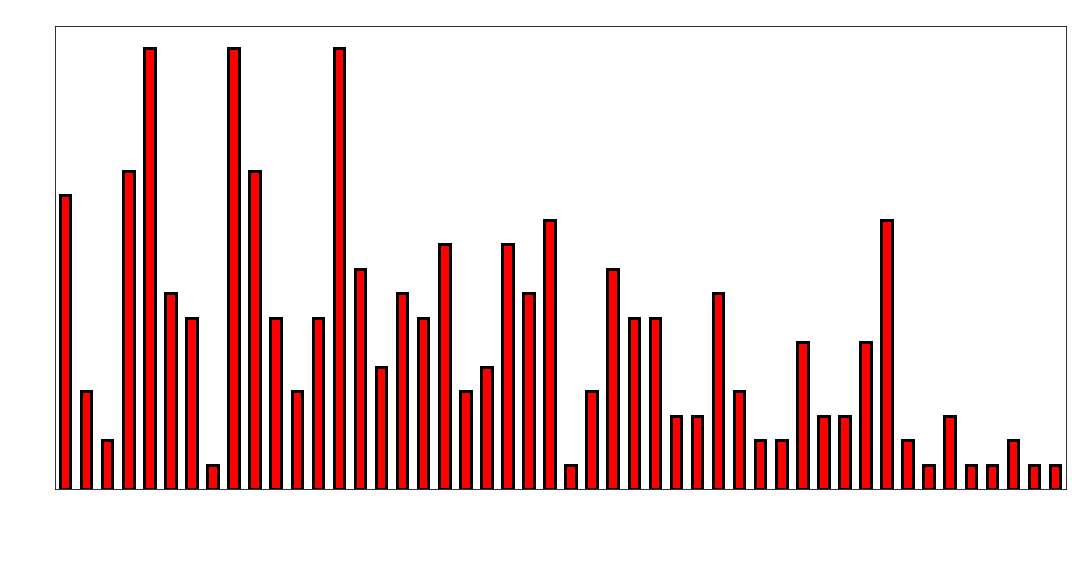

In [63]:
plot_win_loss_distribution(300)

## 1000 fighters

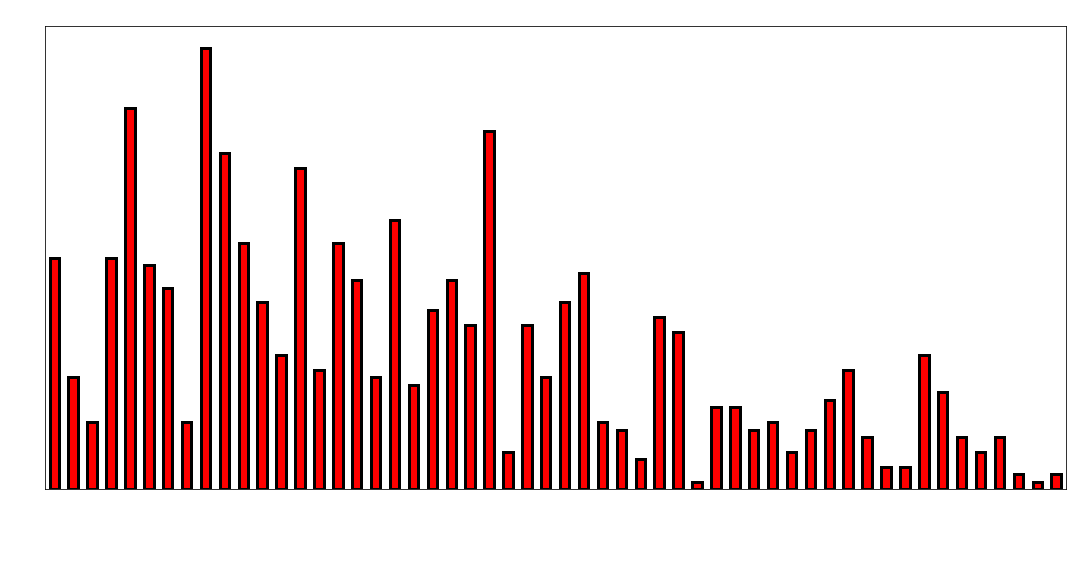

In [64]:
plot_win_loss_distribution(1_000)

## 10,000 Fighters

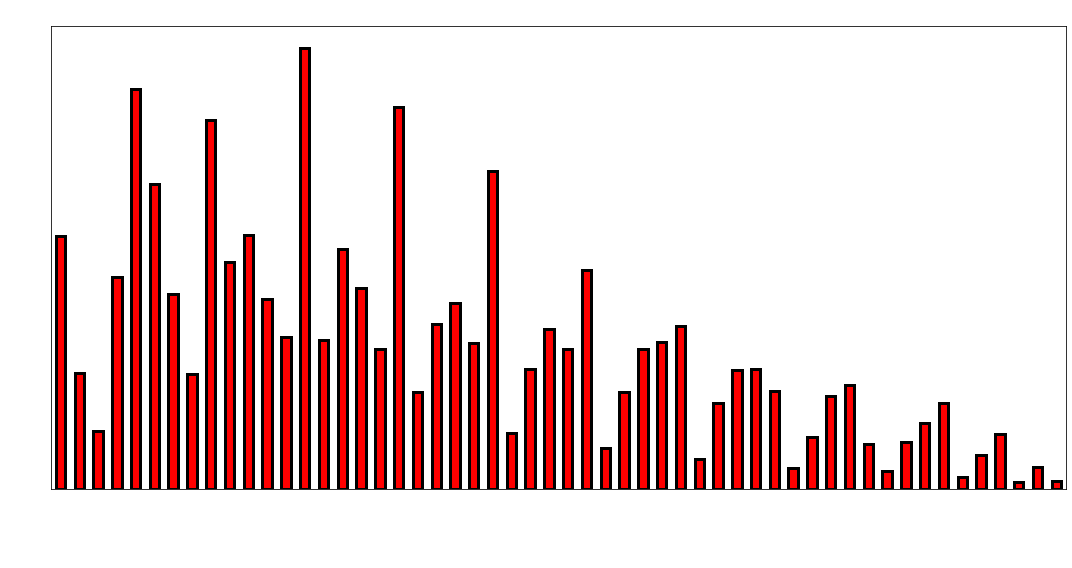

In [65]:
plot_win_loss_distribution(10_000)

In [ ]:
df['win pct'] = df['Wins']/(df['Wins'] + df['Losses'])

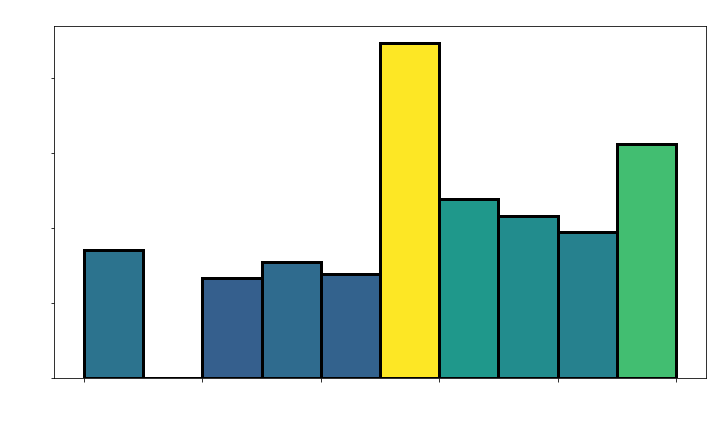

In [61]:
plot_fighter_data(10_000)

In [67]:
fake = Faker()

male_names = [fake.name_male() for _ in range(5_000)]
female_names = [fake.name_female() for _ in range(5_000)]

# Combine the lists
ufc_fighter_names = male_names + female_names


In [68]:
df.index = ufc_fighter_names

In [69]:
df

,Wins,Losses
Mr. Barry Berry,3,0
Kevin Robbins,2,0
John Lewis,3,0
James Baker,1,0
Christopher Stewart,3,0
...,...,...
Alexis Houston,4,4
Joanne Phillips,2,4
Erin Schneider,2,4
Kelsey Ramirez,0,4
